# Table of Content
- [Overview](#Overview)
- [Tableau](https://public.tableau.com/app/profile/kezia.neema/viz/Aircraft_accidents_analysis/Aircraftaccidentdash?publish=yes)
- [Final Recommendation](#Final-recommendation)

# Overview
To address the business problem of identifying the lowest risk aircraft for the company's new aviation division, we will perform a comprehensive analysis of the aviation accident data provided by the National Transportation Safety Board (NTSB). Here's a detailed outline of our approach, including the deliverables and the insights we aim to derive.

Project Outline
1. **Data Exploration and Preparation**
    - Data Loading: Load the dataset and explore its structure, including the range of years, types of aircraft, and nature of incidents.
    - Data Cleaning: Handle missing values appropriately (e.g., imputation, removal) and ensure data consistency.
    - Data Transformation: Aggregate data by aircraft model, manufacturer, and other relevant attributes to facilitate analysis.

2. **Risk Assessment Analysis**
    - Accident Frequency: Calculate the number of accidents per aircraft model and manufacturer.
    - Severity of Accidents: Evaluate the severity of accidents (fatalities, injuries, damages) and categorize them.
    - Incident Types: Analyze common causes of incidents and accidents to identify patterns or frequent issues.

3. **Data Visualization and Insights**
    - Interactive Dashboard: Create an interactive dashboard using a tool like Plotly Dash or Power BI, allowing users to explore accident data by aircraft model, year, manufacturer, and other filters.
    - Visualizations:
        - Bar charts showing accident frequency by aircraft model and manufacturer.
        - Line graphs depicting trends in accident rates over time.
        - Heatmaps or bubble charts illustrating the severity and types of incidents.
4. Business Recommendations
    - Based on the analysis, we will formulate three concrete business recommendations for the head of the new aviation division

## Business Understanding
In an effort to diversify its holdings, the business is entering the aviation sector with the goal of buying and managing aircraft for both public and private companies. Entering this strictly regulated and safety-sensitive sector, however, carries a considerable chance of mishaps and mishaps.

The business must carefully evaluate and reduce these risks by choosing aircraft models that have been shown to be dependable and safe in order to guarantee a successful entry. In order to find trends, comprehend recurring causes of mishaps, and ascertain which aircraft type and manufacturers have the best safety records, this entails studying historical data on aviation accidents.

The business may reduce possible risks, guarantee passenger safety, and establish a respectable and prosperous aviation segment by making data-driven decisions. 

By giving the head of the new aviation business practical advice and insights on which aircraft to buy, the company hopes to establish itself as a leader in the aviation industry for the long run.

## Data Understanding
We are working with data from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) which contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

The data is contained in a csv file:
- AviationData.csv: Each record represents an accident with details about the accident

### Data Exploration and Preparation
- Data Loading: Load the dataset and explore its structure, including the range of years, types of aircraft, and nature of incidents.
- Data Cleaning: Handle missing values appropriately (e.g., imputation, removal) and ensure data consistency.
- Data Transformation: Aggregate data by aircraft model, manufacturer, and other relevant attributes to facilitate analysis.

### Loading Data with Pandas

In [37]:
# Importing modules
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [38]:
# Load the data
df = pd.read_csv('AviationData.csv', encoding='cp1252')
df.head()

c:\Users\navil\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Data Exploration and Cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We notice some missing values in some columns and also that the data involves only two datatypes

In [40]:
# Check for duplicated rows
df.duplicated().sum()

0

Inspecting the columns to check the percentage of missing values in each

In [41]:
# Check missing values
missing_series = df.isna().sum() / len(df)

# Sort
missing_series.sort_values(ascending=False, inplace=True)
missing_series

Schedule                  0.858453
Air.carrier               0.812710
FAR.Description           0.639742
Aircraft.Category         0.636772
Longitude                 0.613304
Latitude                  0.613203
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number     

We notice some columns have significant amount of missing data values.
Its best to drop the once we dont need for the analysis

In [42]:
# Drop columns with many missing values that are not relevant
columns_to_drop = ['Schedule', 'Air.carrier', 'FAR.Description', 'Longitude', 'Latitude']

df.drop(columns_to_drop, axis=1, inplace=True)

In [43]:
df.isna().sum().sort_values(ascending=False) / len(df)

Aircraft.Category         0.636772
Airport.Code              0.434699
Airport.Name              0.406113
Broad.phase.of.flight     0.305606
Publication.Date          0.154924
Total.Serious.Injuries    0.140737
Total.Minor.Injuries      0.134246
Total.Fatal.Injuries      0.128261
Engine.Type               0.079616
Report.Status             0.071786
Purpose.of.flight         0.069660
Number.of.Engines         0.068445
Total.Uninjured           0.066510
Weather.Condition         0.050535
Aircraft.damage           0.035932
Registration.Number       0.014816
Injury.Severity           0.011250
Country                   0.002542
Amateur.Built             0.001147
Model                     0.001035
Make                      0.000709
Location                  0.000585
Event.Date                0.000000
Accident.Number           0.000000
Investigation.Type        0.000000
Event.Id                  0.000000
dtype: float64

The Aircraft category has a significant amount of missing data but it is important for our analysis. Since it is categorical we can just add another column for missing values

In [44]:
# Inspect Aircraft.Category
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

#### Dropping rows
Both make and model columns have few missing values. We decide to drop the few rows with missing values.

In [45]:
# Drop rows missing model or make
df.dropna(subset=['Make', 'Model'], inplace=True)
df[['Make', 'Model']].isna().sum()

Make     0
Model    0
dtype: int64

In [46]:
# Rearrange row index
df.reset_index(drop=True, inplace=True)

In [47]:
df['Amateur.Built'].value_counts()

No     80240
Yes     8438
Name: Amateur.Built, dtype: int64

The Amateur.Built column is categorical with only two categories so it is best to impute the missing values with the  mode

In [48]:
# Check amateuer built column
df['Amateur.Built'].mode()

0    No
dtype: object

In [49]:
# fill the column with the mode
df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0], inplace=True)
df['Amateur.Built'].isna().sum()

0

#### Imputing with the mean
The four colums with info about injuries have continuous data so we decide to impute the missing values with the means

In [50]:
# Imputing with mean
df['Total.Fatal.Injuries'].fillna(np.floor(df['Total.Fatal.Injuries'].mean()), inplace=True)
df['Total.Minor.Injuries'].fillna(np.floor(df['Total.Minor.Injuries'].mean()), inplace=True)
df['Total.Serious.Injuries'].fillna(np.floor(df['Total.Serious.Injuries'].mean()), inplace=True)
df['Total.Uninjured'].fillna(np.floor(df['Total.Uninjured'].mean()), inplace=True)

In [51]:
# impute number of engines column with mean
df['Number.of.Engines'].fillna(np.floor(df['Number.of.Engines'].mean()), inplace=True)

#### Handling missing values for remaining categorical columns
since the remaining columns are categorical, we decide to impute the missing values with a new category; 'missing'

In [52]:
# fill other missing values with 'missing'
df.fillna('missing', inplace=True)

In [53]:
# Confirm no missing values
df.isna().sum().sum()

0

Now we have completed handling all the missing values. Next we continue the exploration

In [54]:
df['Aircraft.Category'].value_counts()

missing              56532
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

Our data contains info about many aircraft categories but our main interest is on Airplanes, so we filter to only work with Airplanes

In [55]:
# Filter to get only Airplanes
df = df[df['Aircraft.Category'] == 'Airplane']

More cleaning

In [56]:
# inspect the severity column
df[['Injury.Severity', 'Total.Fatal.Injuries']] 

,Injury.Severity,Total.Fatal.Injuries
5,Non-Fatal,0.0
7,Non-Fatal,0.0
8,Non-Fatal,0.0
12,Non-Fatal,0.0
13,Fatal(1),1.0
...,...,...
88757,Non-Fatal,0.0
88761,Non-Fatal,0.0
88764,Non-Fatal,0.0
88765,Minor,0.0


#### Cleaning the Aircraft.Categories columns
In the injury severity column, The fatal category includes the fatal injuries in parenthesis. We can filter this since we have a column for that

In [57]:
# More cleaning in injury severity column - dont include no of fatal injuries
df.loc[:, 'Injury.Severity'] = df['Injury.Severity'].map(
    lambda x: 'Fatal' if 'Fatal(' in x else x
)

In [58]:
# Check available categories
df['Injury.Severity'].value_counts()

Non-Fatal      21041
Fatal           5171
missing          812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: Injury.Severity, dtype: int64

#### Creating one name as a combination of make and model
this to help in investigating on a prticular aircraft

In [59]:
# Create Unique name field
df.loc[:, 'Unique_name'] = df['Make'] + '_' + df['Model']

Changing the Event.Date to datetime object to ease working with the dates

In [60]:
# Change to datetime dtype
df.loc[:, 'Event.Date'] = pd.to_datetime(df['Event.Date'])

Creating a new column 'year' that contains the year

In [61]:
# create new column for year
df['year'] = df['Event.Date'].map(lambda x: x.year)
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Unique_name', 'year'],
      dtype='object')

### Plotting  the trend of accidents and incidents over the years

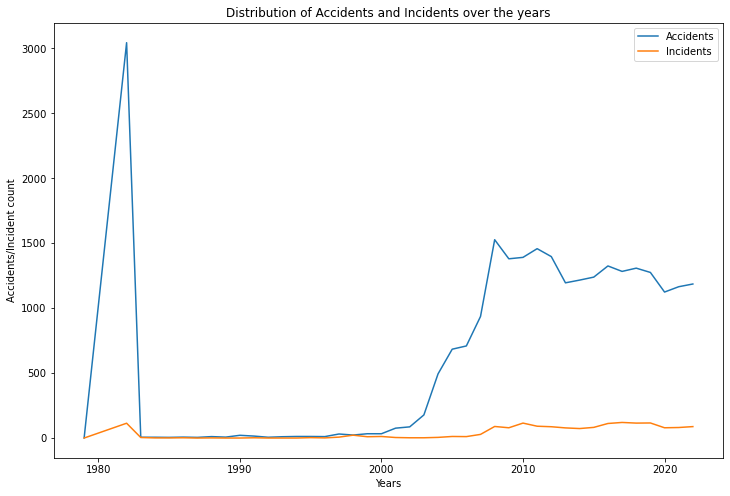

In [69]:
accident_incident_year_df = (
    df.groupby('year')['Investigation.Type'].value_counts().unstack(fill_value=0)
)

year_fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(
    data=accident_incident_year_df,
    x=accident_incident_year_df.index,
    y='Accident',
    ax=ax,
    label='Accidents'
)
sns.lineplot(
    data=accident_incident_year_df,
    x=accident_incident_year_df.index,
    y='Incident',
    ax=ax,
    label='Incidents'
)
ax.set_title('Distribution of Accidents and Incidents over the years')
ax.set_xlabel('Years')
ax.set_ylabel('Accidents/Incident count')
plt.legend()

## Few Accidents = low Risk

We now filter to obtain the aircrafts with the lowest number of accidents 

Few accidents indicate that the aircraft has a low risk of getting an accident

We group the df  to obtain records of accidents and count accident and incidents cases for each aircraft

In [114]:
# Group by investigation type to get count of accidents for each model
accidents_series = df[df['Investigation.Type'] == 'Accident'].groupby(
    ['Unique_name']
)['Investigation.Type'].count()

# create df for incident and accident count

accident_incident_df = (
    df.groupby('Unique_name')['Investigation.Type'].value_counts().unstack(fill_value=0)
)
accident_incident_df.columns = ['accident_count', 'incident_count']

# Reset index and drop duplicates
accident_incident_df.reset_index(inplace=True)
accident_incident_df.drop_duplicates(inplace=True)
accident_incident_df

,Unique_name,accident_count,incident_count
0,177MF LLC_PITTS MODEL 12,1,0
1,2007 Savage Air LLC_EPIC LT,0,1
2,2021FX3 LLC_CCX-2000,2,0
3,3XTRIM_450 ULTRA,1,0
4,5 RIVERS LLC_SQ-2,1,0
...,...,...,...
8515,de Havilland_DHC-2 MK I,1,0
8516,de Havilland_DHC-3,1,0
8517,de Havilland_DHC-6-200,1,0
8518,de Havilland_DHC-8-202,1,0


Creating a new columns for total count of both accidents and incidents

Highest count means highest risk

In [115]:
# Create new column for total accidents and incidents
accident_incident_df['total_accidents_incidents'] = (
    accident_incident_df['accident_count'] + accident_incident_df['incident_count']
)
accident_incident_df.sort_values('total_accidents_incidents', ascending=False, inplace=True)
accident_incident_df.head()

,Unique_name,accident_count,incident_count,total_accidents_incidents
2012,CESSNA_172,488,5,493
2607,Cessna_172,373,1,374
1084,BOEING_737,100,268,368
2596,Cessna_152,253,4,257
2062,CESSNA_182,189,4,193


### Plotting to See the Top 50 Riskiest aircrafts

Text(0.5, 1.0, 'Top 5o Riskiest Aircrafts')

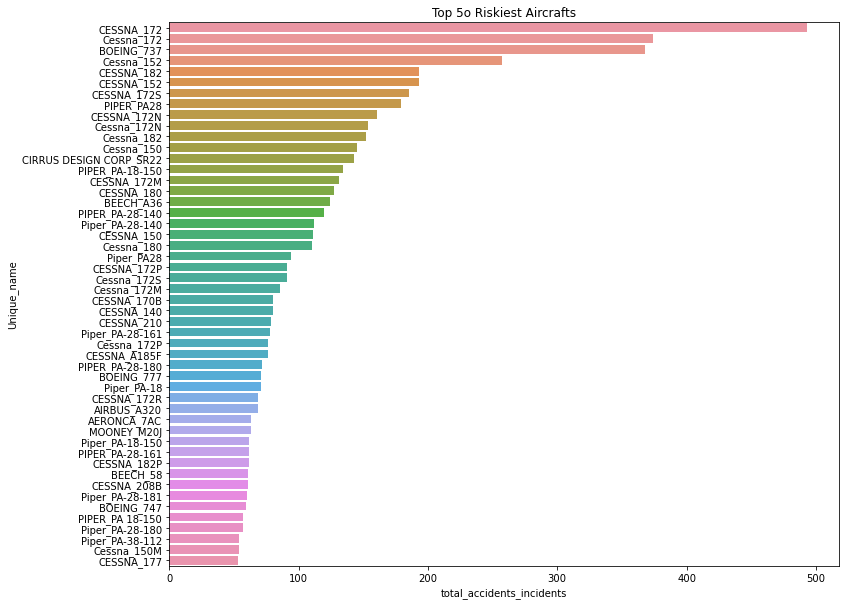

In [116]:
# plot top riskiest aircrafts
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=accident_incident_df.head(50),
            y='Unique_name',
            x='total_accidents_incidents',
            orient='h',
            ax=ax)
plt.title('Top 5o Riskiest Aircrafts')


### Get a df of the Aircrafts with the lowest count of Both incident and Accidents
This will give us the lowest risk aircrafts in terms of occurence of accidents or incidents

The lowest risk could be the one with no incidents and no accidents but none meets this criteria

We can filter to get the Aircrafts with no accidents : They have lower risk 

Also we get the ones with the fewest number of Incidents

In [117]:
# Get aircrafts with lowest incidents and no accidents
lowest_accidents_incidents = accident_incident_df[
    (accident_incident_df['accident_count'] == 0) &
    (
        accident_incident_df['total_accidents_incidents'] ==
        accident_incident_df['total_accidents_incidents'].min()
    )
]

lowest_accidents_incidents.set_index('Unique_name', inplace=True)
lowest_accidents_incidents

,accident_count,incident_count,total_accidents_incidents
Unique_name,,,
PIPER_PA-46-600TP,0,1,1
PIPER_PA32R - 301T,0,1,1
PIPER_PA19,0,1,1
MCDONNELL-DOUGLAS_DC-10-30,0,1,1
MCDONNELL DOUGLAS_MD82,0,1,1
...,...,...,...
Embraer_EMB-120ER,0,1,1
Embraer_EMB-110P1,0,1,1
Embraer_145,0,1,1


Number of accidents or incidents criteria helps us to get down to 356 Aircrafts

## Filtering in Terms of Injury Severity

Create new columns for total number of injuries

In [165]:
df['total_injuries'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Minor.Injuries'] +
    df['Total.Serious.Injuries']
)

In [156]:
# Check the categories
df['Injury.Severity'].value_counts()

Non-Fatal      21041
Fatal           5171
missing          812
Incident         244
Minor            165
Serious          127
Unavailable       20
Name: Injury.Severity, dtype: int64

### What does Unavailable category Mean?

In [155]:
# What does unavailable mean
df[df['Injury.Severity'] == 'Unavailable'].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Unique_name,year
41627,20001208X07697,Accident,DCA97WA043,1997-04-27,"JINAN, CHINA",China,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Mcdonnell Douglas_MD-82,1997
42258,20001208X08352,Accident,DCA97WA054,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,missing,missing,Unavailable,Destroyed,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Learjet_LR-31,1997
42818,20001208X08992,Accident,DCA98WA082,1997-10-09,"HARBIN, CHINA",China,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Cessna_650-0220,1997
42906,20001208X08991,Accident,DCA98WA005,1997-10-24,"MONTEVIDEO, URUGUAY",Uruguay,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Mcdonnell Douglas_MD-11,1997
43664,20001211X09838,Accident,DCA98WA050,1998-04-12,"ALMA-ATA, KAZAKHSTAN",Kazakhstan,missing,missing,Unavailable,Substantial,...,0.0,0.0,0.0,5.0,UNK,missing,Foreign,missing,Boeing_737-200,1998


In [166]:
df[df['Injury.Severity'] == 'Unavailable']['total_injuries'].sum()

0.0

We find out that those with the category 'Unavailable' have no injuries recorded

- There are no type of accidents present

In [160]:
df.loc[df['Injury.Severity'] == 'Unavailable']['Investigation.Type'].value_counts()

Accident    20
Name: Investigation.Type, dtype: int64

We see that the Unavailable are the cases of accidents with no injuries 

### Counting the different types of injury severity for each aircraft

In [173]:
# Group by severity and count
# also transpose to make catogories as columns
severity_count_df = df.groupby(['Injury.Severity', 'Unique_name']).size().unstack(fill_value=0).T

# remove columns name
severity_count_df.columns.name = ""

severity_count_df.head()

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
177MF LLC_PITTS MODEL 12,0,0,0,1,0,0,0
2007 Savage Air LLC_EPIC LT,0,0,0,1,0,0,0
2021FX3 LLC_CCX-2000,0,0,0,2,0,0,0
3XTRIM_450 ULTRA,1,0,0,0,0,0,0
5 RIVERS LLC_SQ-2,0,0,0,0,1,0,0


#### Now we filter to only include indexes of the previously filtered records

In [174]:
# only pick indexes from the previously filtered df with least accidents
check_severity_df = severity_count_df.loc[lowest_accidents_incidents.index, :]
check_severity_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
PIPER_PA-46-600TP,0,0,0,0,0,0,1
PIPER_PA32R - 301T,0,0,0,1,0,0,0
PIPER_PA19,0,0,0,1,0,0,0
MCDONNELL-DOUGLAS_DC-10-30,0,0,0,1,0,0,0
MCDONNELL DOUGLAS_MD82,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
Embraer_EMB-120ER,0,0,0,1,0,0,0
Embraer_EMB-110P1,0,1,0,0,0,0,0
Embraer_145,0,1,0,0,0,0,0


### Check incidents with no Injuries

In [175]:
# filter to get normal incidents without injuries
check_severity_df = check_severity_df[check_severity_df['Incident'] != 0]
check_severity_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Learjet_36,0,1,0,0,0,0,0
Lockheed_WP-3D,0,1,0,0,0,0,0
Lockheed_L188C,0,1,0,0,0,0,0
Lockheed_L1011,0,1,0,0,0,0,0
Nunn_KR2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Douglas_DC9-30,0,1,0,0,0,0,0
Embraer_EMB-11OP1,0,1,0,0,0,0,0
Embraer_EMB-145,0,1,0,0,0,0,0


We are down to 93 aircrafts which only have Incidents cases that recorded no injuries



#### Filtering to remove amateur built aircrafts to ensure only professional aircrafts

In [198]:
amateur_built = set(df[df['Amateur.Built'] == 'Yes']['Unique_name'])

In [177]:
# check to remove amateur built
amateur_present = set(check_severity_df.index) & amateur_built

In [179]:
severity_checked_df = check_severity_df
severity_checked_df

,Fatal,Incident,Minor,Non-Fatal,Serious,Unavailable,missing
Unique_name,,,,,,,
Learjet_36,0,1,0,0,0,0,0
Lockheed_WP-3D,0,1,0,0,0,0,0
Lockheed_L188C,0,1,0,0,0,0,0
Lockheed_L1011,0,1,0,0,0,0,0
Nord Aviation_262A-12,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
Douglas_DC9-30,0,1,0,0,0,0,0
Embraer_EMB-11OP1,0,1,0,0,0,0,0
Embraer_EMB-145,0,1,0,0,0,0,0


we've now come down to 89 aircrafts but this are too many to recommend

In [180]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Unique_name', 'year', 'total_injuries'],
      dtype='object')

### Filtering to get least Damaged


In [181]:
df['Aircraft.damage'].value_counts()

Substantial    21698
Destroyed       3542
missing         1279
Minor            961
Unknown          100
Name: Aircraft.damage, dtype: int64

In [182]:
# Check damage 
damage_df = df.groupby(['Unique_name', 'Aircraft.damage']).size().unstack(fill_value=0)
damage_df.columns.name = ''


# use the severity checked df indexes
damage_df = damage_df.loc[severity_checked_df.index, :]
damage_df.head()

,Destroyed,Minor,Substantial,Unknown,missing
Unique_name,,,,,
Learjet_36,0,1,0,0,0
Lockheed_WP-3D,0,0,0,0,1
Lockheed_L188C,0,0,0,0,1
Lockheed_L1011,0,1,0,0,0
Nord Aviation_262A-12,0,1,0,0,0


We use the minor sub category

In [183]:
# Filter to get aircrafts with only minor damages
major_damage_columns = ['Destroyed', 'Substantial', 'Unknown', 'missing']
minor_damage_df = damage_df.loc[damage_df.loc[:, major_damage_columns].sum(axis=1) == 0]

In [184]:
# Check Aircraft with least cases
minor_damage_df['Minor'].min()

1

In [185]:
minor_damage_df['Minor'].value_counts()

1    48
Name: Minor, dtype: int64

Now we are down to 48 

In [186]:
# Filtered to get minor damages only
current_filtered_df = minor_damage_df

In [187]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date',
       'Unique_name', 'year', 'total_injuries'],
      dtype='object')

### Does Engine type affect the accidents and incidents
we check to filter the lowest risk engine since different engines are associated different frequency of occurence of accidents or incidents

In [188]:
# Check engine categories
df['Engine.Type'].value_counts()

Reciprocating      20696
missing             4213
Turbo Prop          1366
Turbo Fan            967
Turbo Jet            158
Unknown              151
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

#### Grouping according to engine type
This is to get the engine type associated with the least cases of incidents

we can conclude that its the best engine

In [189]:
# Group by engine type 
engine_type_df = df[['Engine.Type', 'Investigation.Type', 'Unique_name']]

# get only incidents
engine_incident_df = engine_type_df[engine_type_df['Investigation.Type'] == 'Incident']

In [190]:
# Group to get engine types with the most incidents
engine_incident_count_df = engine_incident_df.groupby(['Engine.Type']).count().reset_index()

# sort the df
engine_incident_count_df.sort_values(by='Investigation.Type', inplace=True)

# Rename the investigation type column
engine_incident_count_df.rename(
    columns=lambda x: 'incident_count' if x == 'Investigation.Type' else x,
    inplace=True
)
engine_incident_count_df.head()

,Engine.Type,incident_count,Unique_name
5,Turbo Shaft,1,1
0,Geared Turbofan,12,12
3,Turbo Jet,40,40
6,Unknown,53,53
4,Turbo Prop,114,114


## Plotting the Distribution of the incidents by engine type

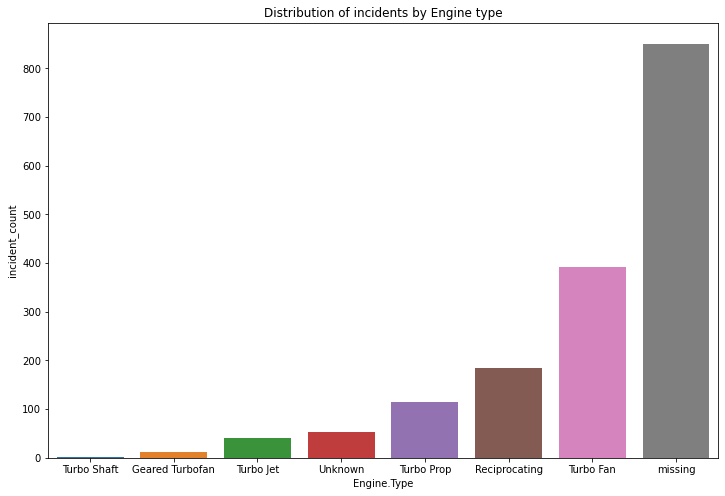

In [191]:
# plot the distribution of incidents by engine type
fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data=engine_incident_count_df, x='Engine.Type', y='incident_count')
ax.set_title('Distribution of incidents by Engine type');

#### Checking the lowest risk engine type

In [199]:
# Get Turbo Shaft Aircrafts
engine_type_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == engine_incident_count_df.iloc[0]['Engine.Type']
]['Unique_name']

In [200]:
# Check how many in the series
len(engine_type_lowest_risk_series)

1

now we check if our filtered data has Aircrafts with the lowest risk engine type

In [194]:
# Check Turbo Shaft
current_lowest_risk = set(engine_type_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

0

No Airrcraft has the engine in our dat a so we uwe the second lowest risk type

In [201]:
# check Geared Turbofan
engine_type_second_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == engine_incident_count_df.iloc[1]['Engine.Type']
]['Unique_name']

current_lowest_risk = set(engine_type_second_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

0

Still no, we go to the third lowest

In [204]:
# Check third_lowest risk engine type
engine_type_third_lowest_risk_series = engine_incident_df[
    engine_incident_df['Engine.Type'] == engine_incident_count_df.iloc[2]['Engine.Type']
]['Unique_name']

current_lowest_risk = set(engine_type_third_lowest_risk_series.values) & set(current_filtered_df.index)
len(current_lowest_risk)

2

Now we are down to two Aircrafts 🎉'🎉🎉

This seems like a reasonable recommendation

In [197]:
print(f'Lowest Risk aircrafts are: {current_lowest_risk}')

Lowest Risk aircrafts are: {'Rockwell_NA-265-80', 'Boeing_B737-2H4'}


# Final-Recommendation
From our analysis we concluded to two Aircrafts 

|| **Make** | **Model** |
|--|----------|-----------|
|1. | Rockwell | NA-265-80 |
|2. | Boeing | B737-2H4 |